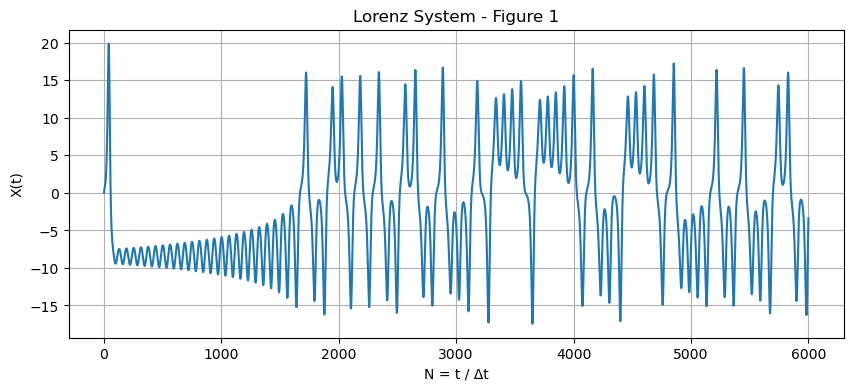

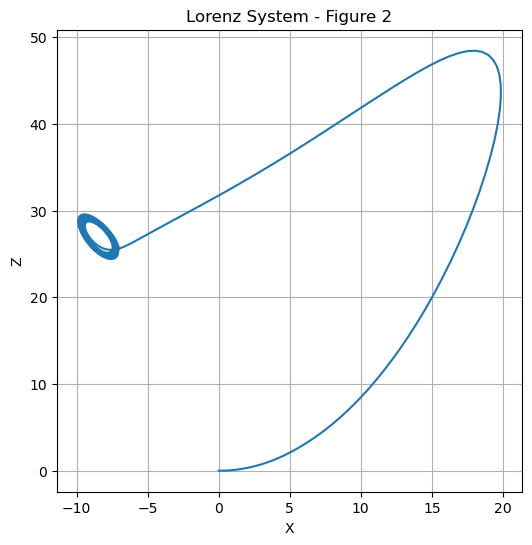

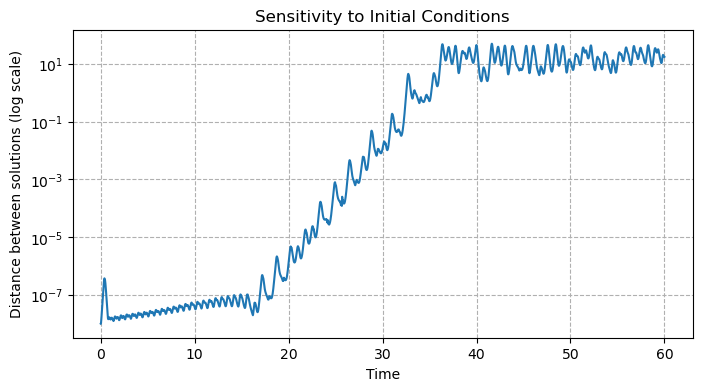

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ass3

# Initial conditions, and parameters
W0 = [0.0, 1.0, 0.0]
params = {'sigma': 10.0, 'r': 28.0, 'b': 8.0/3.0}

# Time span for integration
t_span = (0, 60)
t_eval = np.linspace(*t_span, int(60/0.01))

# Solve the system
sol = solve_ivp(ass3.lorenz, t_span, W0, t_eval=t_eval, args=(params['sigma'], params['r'], params['b']))

#Figure 1: Time series
plt.figure(figsize=(10, 4))
plt.plot(sol.t / 0.01, sol.y[0])  # X vs. N = t/dt
plt.xlabel("N = t / Δt")
plt.ylabel("X(t)")
plt.title("Lorenz System - Figure 1")
plt.grid(True)
plt.show()

# === Figure 2: Phase portrait ===
t_zoom = np.linspace(14, 19, 1000)
sol_zoom = sol.sol(t_zoom) if sol.sol else solve_ivp(ass3.lorenz, [14, 19], W0, t_eval=t_zoom, args=(params['sigma'], params['r'], params['b'])).y

plt.figure(figsize=(6, 6))
plt.plot(sol_zoom[0], sol_zoom[2])  # X vs Z
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Lorenz System - Figure 2")
plt.grid(True)
plt.show()

# === Divergence from small perturbation ===
W0_prime = [0.0, 1.00000001, 0.0]

sol_original = solve_ivp(ass3.lorenz, t_span, W0, t_eval=t_eval, args=(params['sigma'], params['r'], params['b']))
sol_perturbed = solve_ivp(ass3.lorenz, t_span, W0_prime, t_eval=t_eval, args=(params['sigma'], params['r'], params['b']))

# Compute distance over time
distance = np.linalg.norm(sol_original.y - sol_perturbed.y, axis=0)

plt.figure(figsize=(8, 4))
plt.semilogy(sol.t, distance)
plt.xlabel("Time")
plt.ylabel("Distance between solutions (log scale)")
plt.title("Sensitivity to Initial Conditions")
plt.grid(True, which="both", ls="--")
plt.show()